In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
train_data = pd.read_csv('../data/processed/processed_train.csv', index_col=0)
test_data = pd.read_csv('../data/processed/processed_test.csv', index_col=0)

In [4]:
analysis_data = pd.concat([train_data, test_data])
analysis_data.drop_duplicates(['SiteId', 'Timestamp'])
analysis_data.head()

,Timestamp,SiteId,Value,day_of_week,day_of_month,day_of_year,month,year,Temperature,is_day_off,BaseTemperature,Surface,is_holiday,is_holiday_elsewhere
0,2014-09-03,1,9.096555e+05,2,3,246,9,2014,20.00,0.0,18.0,1387.205119,0,0
1,2014-09-04,1,1.748273e+06,3,4,247,9,2014,22.25,0.0,18.0,1387.205119,0,0
5,2014-09-08,1,1.964878e+06,0,8,251,9,2014,17.80,0.0,18.0,1387.205119,0,0
6,2014-09-09,1,3.266904e+06,1,9,252,9,2014,19.00,0.0,18.0,1387.205119,0,0
7,2014-09-10,1,2.926094e+06,2,10,253,9,2014,22.00,0.0,18.0,1387.205119,0,0


<Axes: xlabel='SiteId', ylabel='Value'>

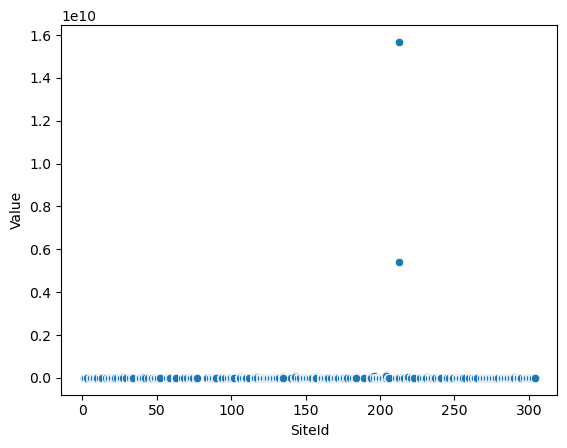

In [5]:
sns.scatterplot(data=analysis_data, x="SiteId", y="Value")

In [15]:
abnormal_sites = analysis_data[analysis_data['Value'] > 1 * 1e8]["SiteId"].unique()
abnormal_sites

array([], dtype=int64)

### Mức độ tiêu thụ theo các toà nhà

<Axes: xlabel='SiteId', ylabel='Value'>

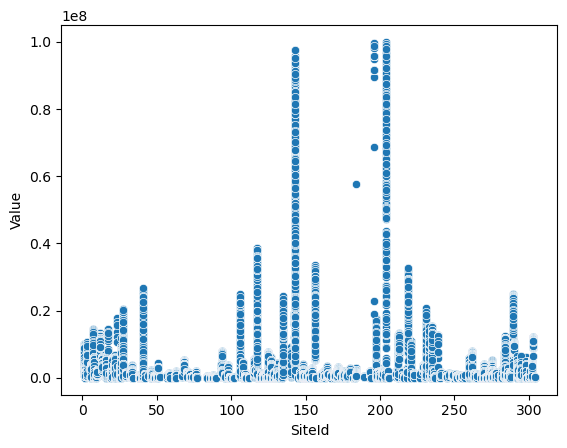

In [13]:
analysis_data = analysis_data[analysis_data['Value'] < 1 * 1e8]
sns.scatterplot(data=analysis_data, x="SiteId", y="Value")

<Axes: xlabel='Value', ylabel='Count'>

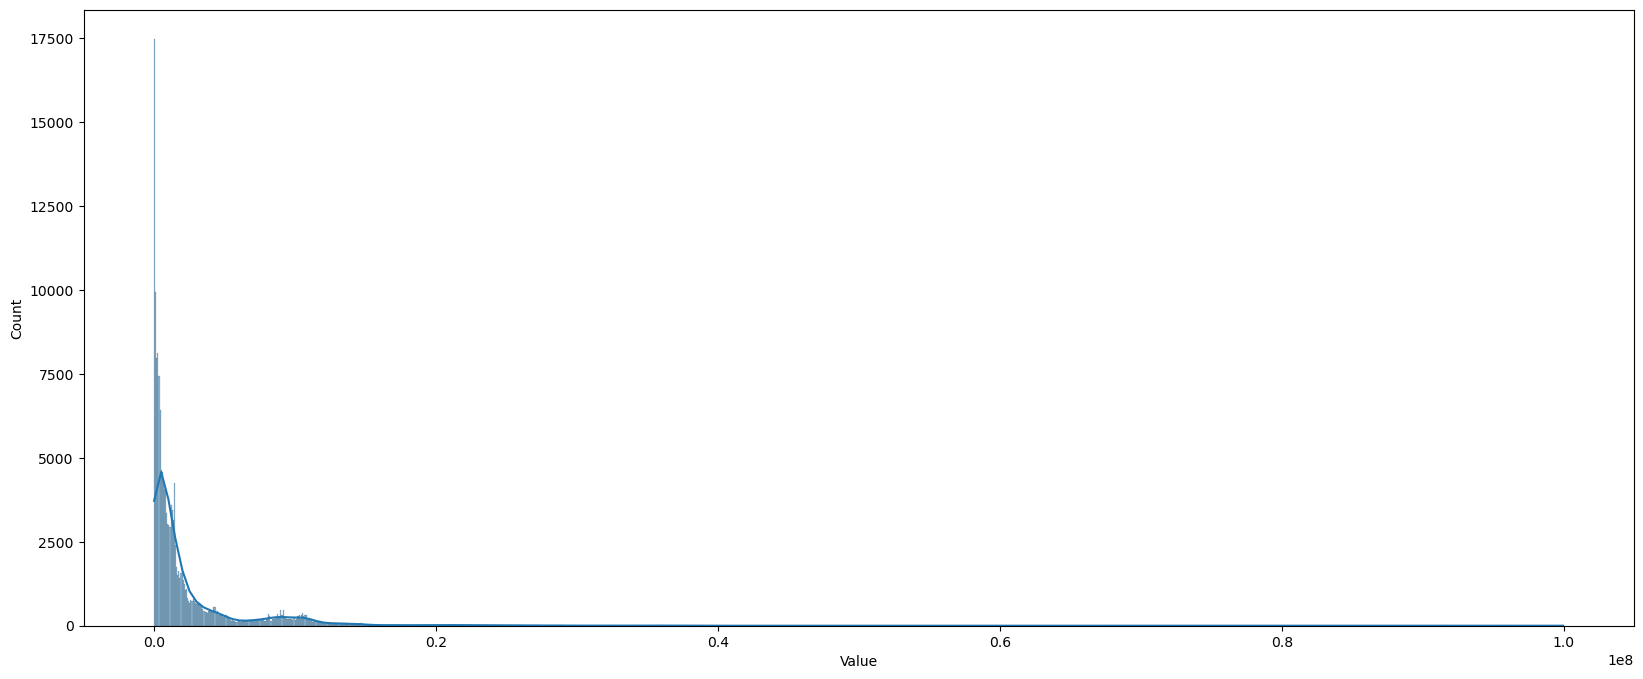

In [16]:
f, ax = plt.subplots(figsize=(20, 8))
sns.histplot(
    analysis_data["Value"], kde=True, ax=ax
)

### Ma trận tương quan giữa các thuộc tính

<Axes: >

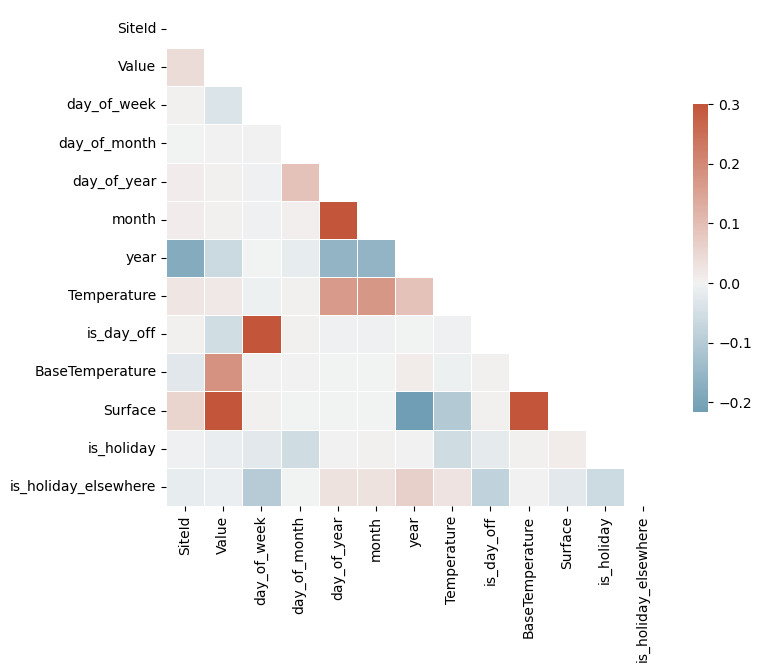

In [17]:
corr = analysis_data.drop('Timestamp', axis=1).corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(8, 8))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

### Mức tiêu thụ theo năm

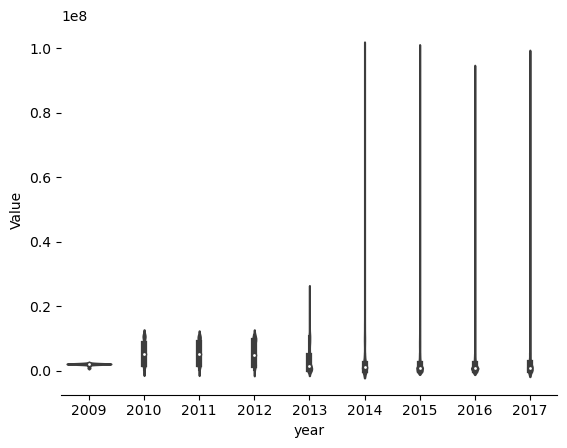

In [22]:
df = analysis_data[["year", "SiteId", 'Value']].copy()
sns.violinplot(data=df, x="year", y="Value")
sns.despine(left=True)

### Mức tiêu thụ trung bình theo ngày trong tuần

<Axes: xlabel='day_of_week', ylabel='Value'>

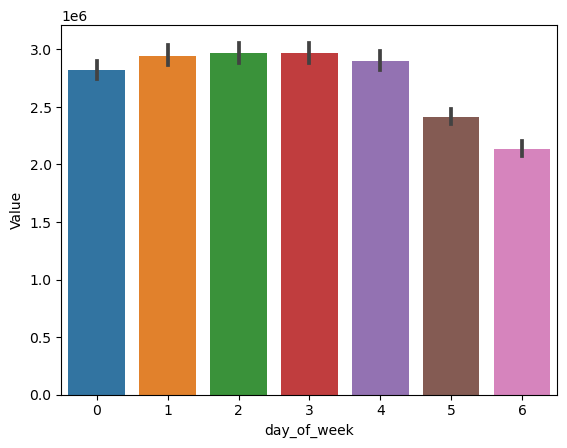

In [19]:
df = analysis_data[["day_of_week", "SiteId", 'Value']]


sns.barplot(df, x="day_of_week", y='Value')

### Mức tiêu thụ trung bình theo tháng

<Axes: xlabel='month', ylabel='Value'>

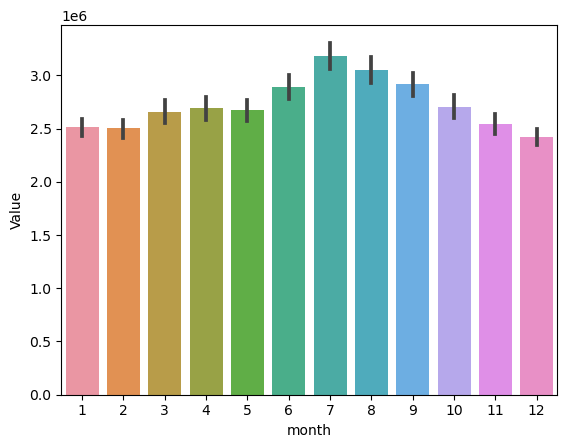

In [20]:
df = analysis_data[["month", "SiteId", 'Value']]


sns.barplot(df, x="month", y='Value')